In [4]:
import numpy as np 
import matplotlib.pyplot as plt


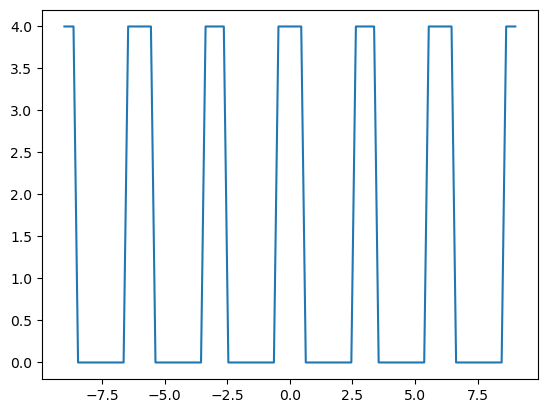

In [117]:
T=3 #période
tau = 1 #la longueur ou c'est non nul
E=4 #hauteur

'''def f(x):
    x = x%T
    v=0
    if (0<=x) & (x<=tau/2):
        v = 1
    return E*v'''

def f(x):
    return E*((x%T<tau/2)|(x%T>(T-tau/2)))


x = np.linspace(-3*T,3*T,100)
y = [f(i) for i in x]

plt.plot(x,y)





In [118]:
N=1000 #aide pour avoir une intégrale précise

def coef_pairs(n,N):
    A_n = [] # stock les coeffs
    for k in range(0,n):
        u = np.array([f(i) for i in np.linspace(0,T,N)])
        cos_k = np.cos(np.linspace(0,T,N)*2*np.pi*k/T)
        if k ==0:
            a_k = 1/T * T/(N-1)*(u*cos_k).sum() #(b-a)/(N-1)
        else:   
            a_k = 2/T * T/(N-1)*(u*cos_k).sum()
        A_n.append(a_k)
    return np.array(A_n)

def coef_impairs(n,N):
    B_n = []
    for k in range(1,n):
        u = np.array([f(i) for i in np.linspace(0,T,N)])
        cos_k = np.sin(np.linspace(0,T,N)*2*np.pi*k/T)
        a_k = 2/T * T/(N-1)*(u*cos_k).sum()
        B_n.append(a_k)
    return np.array(B_n)


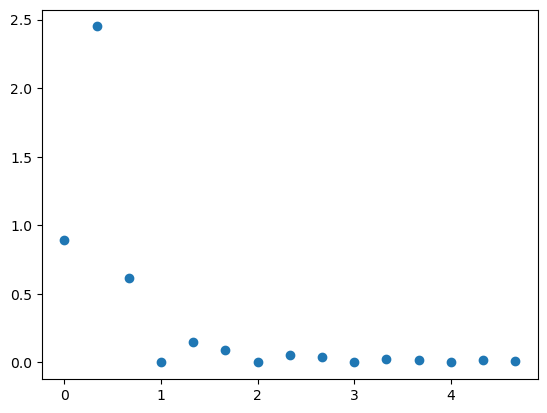

In [119]:
n = 15

A_n = coef_pairs(n,N)
B_n = coef_impairs(n,N)

F = np.arange(0,n,1)/T

C0 = A_n[0]**2/2
C_n = (A_n[1:]**2 + B_n**2)/2

C = np.hstack((C0,C_n))

plt.scatter(F,C)

In [122]:
def f_fou(n,t):
    A_n = coef_pairs(n,N)
    B_n = coef_impairs(n,N)
    return A_n[0] + (A_n[1:]*np.cos(np.arange(1,n,1)*2*np.pi*t/T)).sum()+ (B_n*np.sin(np.arange(1,n,1)*2*np.pi*t/T)).sum()
    
    

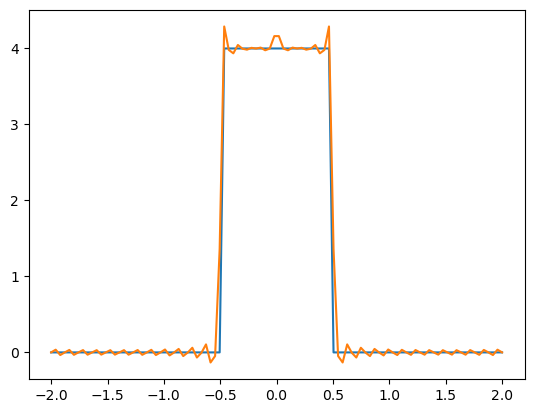

In [123]:
n=50

x = np.linspace(-2,2,100)
y1 = [f(i) for i in x]
y2 = [f_fou(n,i) for i in x]

plt.plot(x,y1)
plt.plot(x,y2)